# VGG16＋機械学習（決定木、ランダムフォレスト、SVM、ロジスティック回帰、k近傍法）による手書き数字の分類


# バージョンの確認とMNISTのロード

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2


print("TensorFlow %s" % tf.__version__)
print("Loading MNIST dataset...", end="")

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("done")
print(" - Training dataset, images: %s, labels: %s" % (train_images.shape, len(train_labels)))
print(" - Test dataset, images: %s, labels: %s" % (test_images.shape, len(test_labels)))


TensorFlow 2.15.0
Loading MNIST dataset...Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11490434/11490434 [==============================] - 0s 0us/step
done
 - Training dataset, images: (60000, 28, 28), labels: 60000
 - Test dataset, images: (10000, 28, 28), labels: 10000


In [ ]:
train_images[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         33, 151, 208, 252, 252, 252, 146,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 152,
        244, 252, 253, 224, 211, 252, 232,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 152, 239, 252,
        252, 252, 216,  31,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 252,
        252, 217,  29,   0,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 252, 252, 220,
        167,  30,   0,   0,  77, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 128,  58,  22,
          0,   0,   0,   0, 100, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 157, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        110, 121, 122, 121, 202, 252, 194,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  53, 179,
        253, 253, 255, 253, 253, 228,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5,  54, 227, 252, 243,
        228, 170, 242, 252, 252, 231, 117,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,  78, 252, 252, 125,  59,
          0,  18, 208, 252, 252, 252, 252,  87,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5, 135, 252, 252, 180,  16,   0,
         21, 203, 253, 247, 129, 173, 252, 252, 184,  66,  49,  49,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3, 136, 252, 241, 106,  17,   0,  53,
        200, 252, 216,  65,   0,  14,  72, 163, 241, 252, 252, 223,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 105, 252, 242,  88,  18,  73, 170, 244,
        252, 126,  29,   0,   0,   0,   0,   0,  89, 180, 180,  37,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 231, 252, 245, 205, 216, 252, 252, 252,
        124,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 207, 252, 252, 252, 252, 178, 116,  36,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  13,  93, 143, 121,  23,   6,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

# 画像の次元拡大とカラー化

trainデータの変換

In [ ]:
def expand_mnist_images(images):
    expanded_images = []
    for img in images:
        expanded_img = cv2.resize(img, (56, 56))
        expanded_images.append(expanded_img)
    return np.array(expanded_images)

def grayscale_to_rgb(images):
    rgb_images = []
    for img in images:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        rgb_images.append(rgb_img)
    return np.array(rgb_images)



# 画像を拡張
expanded_images = expand_mnist_images(train_images)

# グレースケール画像をRGBに変換
XX = grayscale_to_rgb(expanded_images)

# 変換された画像の情報を表示
print("Original MNIST Images Shape:", train_images.shape)
print("Expanded Images Shape:", expanded_images.shape)
print("RGB Images Shape:", XX.shape)

Original MNIST Images Shape: (60000, 28, 28)
Expanded Images Shape: (60000, 56, 56)
RGB Images Shape: (60000, 56, 56, 3)


testデータの変換


In [ ]:
# 画像を拡張
expanded_images = expand_mnist_images(test_images)

# グレースケール画像をRGBに変換
XT = grayscale_to_rgb(expanded_images)

# 変換された画像の情報を表示
print("Original MNIST Images Shape:", train_images.shape)
print("Expanded Images Shape:", expanded_images.shape)
print("RGB Images Shape:", XT.shape)

Original MNIST Images Shape: (60000, 28, 28)
Expanded Images Shape: (10000, 56, 56)
RGB Images Shape: (10000, 56, 56, 3)


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

trainデータの画像の表示

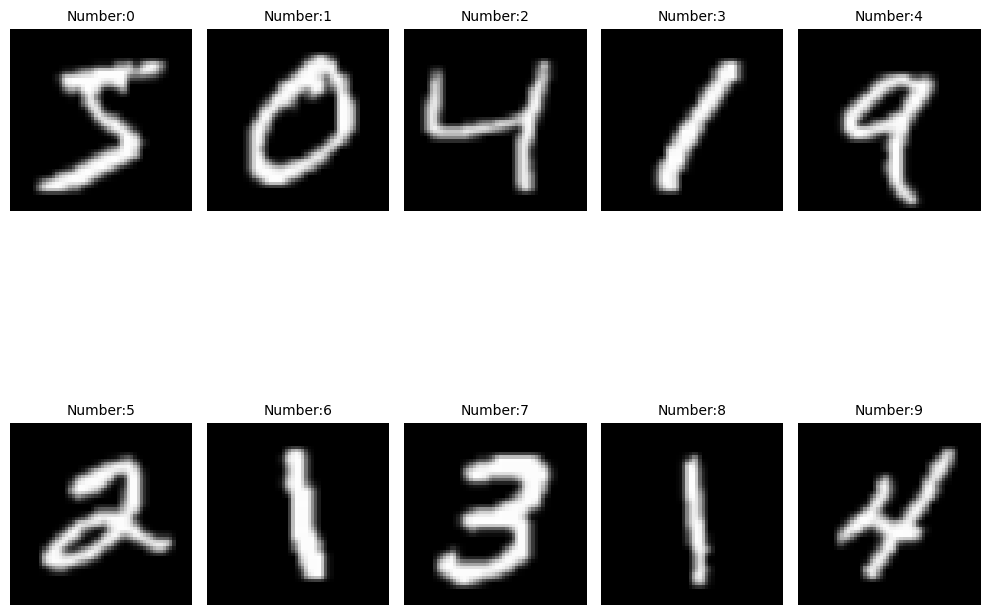

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10.0, 10.0))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(XX[i])
    plt.axis('off')
    plt.title('Number:{}'.format(i), fontsize=10)
plt.tight_layout()
plt.show()

# VGG16モデルの読み込み

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=XX[0].shape)
base_model.trainable = False ## Not trainable weights
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 56, 56, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 56, 56, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 28, 28, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 28, 28, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 28, 28, 128)       147584    
                                                              

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()

# 最後の層(全結合層)を追加
model = models.Sequential([
    base_model,
    flatten_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# VGG16モデルによるデータの出力

In [ ]:
# 規格化
train_ds = np.array(XX).astype(np.float64)
train_ds /= 255

test_ds = np.array(XT).astype(np.float64)
test_ds /= 255

In [ ]:
train_predict = model.predict(train_ds)
train_predict.shape

1875/1875 [==============================] - 9s 4ms/step


(60000, 512)

In [ ]:
test_predict = model.predict(test_ds)
test_predict.shape

313/313 [==============================] - 2s 5ms/step


(10000, 512)

# 1. 決定木の学習

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

clf_tree = DecisionTreeClassifier(max_depth=7)  # max_depthを変えてください
clf_tree.fit(train_predict, train_labels)

print('Accuracy(train):{:.3f}'.format(clf_tree.score(train_predict, train_labels)))
print('Accuracy(test ):{:.3f}'.format(clf_tree.score(test_predict, test_labels)))


Accuracy(train):0.729
Accuracy(test ):0.721


In [ ]:
clf_tree2 = DecisionTreeClassifier(max_depth=10) # max_depthを変えてください
clf_tree2.fit(train_predict, train_labels)

print('Accuracy(train):{:.3f}'.format(clf_tree2.score(train_predict, train_labels)))
print('Accuracy(test ):{:.3f}'.format(clf_tree2.score(test_predict, test_labels)))

Accuracy(train):0.820
Accuracy(test ):0.803


Accuracy: 0.7214
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       980
           1       0.97      0.91      0.94      1135
           2       0.43      0.56      0.49      1032
           3       0.65      0.74      0.69      1010
           4       0.91      0.66      0.77       982
           5       0.68      0.66      0.67       892
           6       0.94      0.71      0.81       958
           7       0.76      0.75      0.75      1028
           8       0.66      0.62      0.64       974
           9       0.56      0.75      0.64      1009

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.73     10000
weighted avg       0.75      0.72      0.73     10000

Confusion Matrix:
[[ 805    0   40    8    0   12   24    3   13   75]
 [   7 1028   50    0    5    0    3   26    7    9]
 [   8    1  582  135    8   51    5   85   75   82]
 [   0    0   75  743   

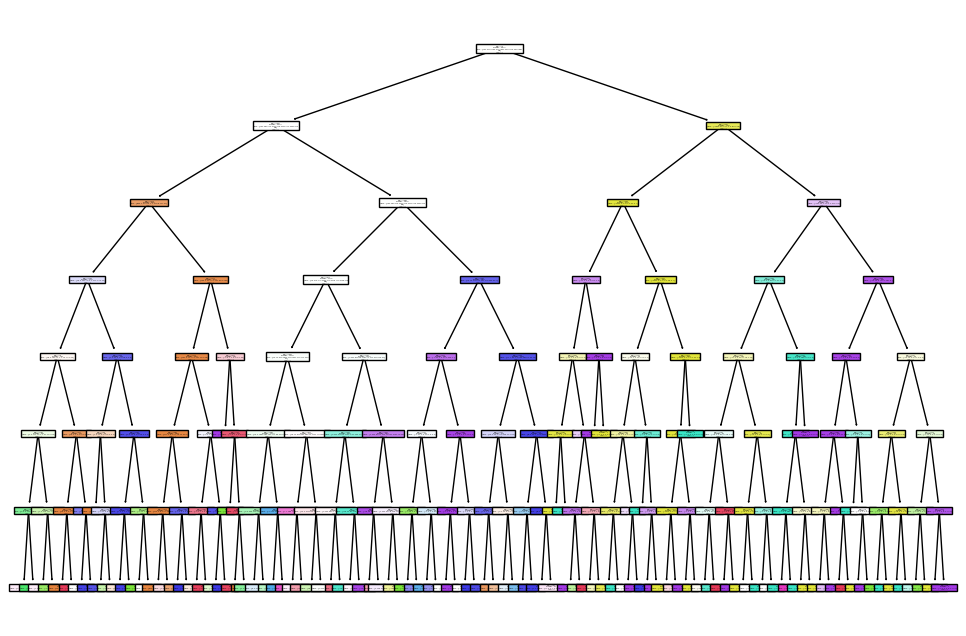

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

# テストデータでの予測
y_pred = clf_tree.predict(test_predict)

# 分類結果の評価
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_labels, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred))
test_labels_name = test_labels.astype(str)
# 決定木の可視化
plt.figure(figsize=(12, 8))
plot_tree(clf_tree, filled=True, feature_names=test_labels_name, class_names=test_labels_name)
plt.show()

# 2. ランダムフォレストで学習


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split, GridSearchCV

# モデルを学習
clf_r = RFC(verbose=True,       # 学習中にログを表示します。この指定はなくてもOK
          n_jobs=-1,          # 複数のCPUコアを使って並列に学習します。-1は最大値。
          random_state=42)  # 乱数のシードです。
clf_r.fit(train_predict, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.0s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=True)

ランダムフォレストでテストデータを評価


In [ ]:
print('Accuracy(train):{:.3f}'.format(clf_r.score(train_predict, train_labels)))
print('Accuracy(test ):{:.3f}'.format(clf_r.score(test_predict, test_labels)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


Accuracy(train):1.000
Accuracy(test ):0.956


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


# 3. SVMで学習



In [ ]:
# ライブラリのインポート
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# インスタンス作成
clf_svm = SVC(random_state=0)

X = train_predict
Y = train_labels

clf_svm.fit(X,Y)

# 作成したモデルの表示
print(clf_svm)


SVC(random_state=0)


SVMでテストデータを評価

In [ ]:
print('Accuracy(train):{:.3f}'.format(accuracy_score(train_labels, clf_svm.predict(train_predict))))
print('Accuracy(test):{:.3f}'.format(accuracy_score(test_labels, clf_svm.predict(test_predict))))

Accuracy(train):0.969
Accuracy(test):0.972


# 4. ロジスティック回帰で学習



In [ ]:
# ライブラリのインポート
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# インスタンス作成
clf_rg = LogisticRegression(solver='liblinear')

# 説明変数
X = train_predict

# 目的変数target
Y = train_labels

# 予測モデルを作成
clf_rg.fit(X, Y)

# 精度算出
print('Accuracy(train):{:.3f}'.format(accuracy_score(Y, clf_rg.predict(X))))
print('Accuracy(test):{:.3f}'.format(accuracy_score(test_labels, clf_rg.predict(test_predict))))


Accuracy(train):0.979
Accuracy(test):0.975


# 5. ｋ近傍法で学習

In [ ]:
# ライブラリのインポート
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# インスタンス作成
clf_knn = KNeighborsClassifier(n_neighbors=7)

# 説明変数
X = train_predict

# 目的変数target
Y = train_labels

# 予測モデルを作成
clf_knn.fit(X, Y)

# 作成したモデルの表示
print(clf_knn)

# 精度算出
print('Accuracy(train):{:.3f}'.format(accuracy_score(Y, clf_knn.predict(X))))
print('Accuracy(test):{:.3f}'.format(accuracy_score(test_labels, clf_knn.predict(test_predict))))

KNeighborsClassifier(n_neighbors=7)
Accuracy(train):0.976
Accuracy(test):0.966


実際に手書き数字を描いて試してみよう


In [ ]:
import IPython
from google.colab import output
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import base64
import tensorflow as tf
from tensorflow import keras
import pickle
from google.colab.patches import cv2_imshow

def run(img_str):
    #decode to image
    decimg = base64.b64decode(img_str.split(',')[1], validate=True)
    decimg = Image.open(BytesIO(decimg))
    decimg = np.array(decimg, dtype=np.uint8)
    decimg = cv2.cvtColor(decimg, cv2.COLOR_BGR2RGB)

    # 画像を二値化
    gray = cv2.cvtColor(decimg, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    im2 = cv2.threshold(gray, 100, 240, cv2.THRESH_BINARY_INV)[1]

    # 輪郭を抽出
    cnts = cv2.findContours(im2,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]

    # 抽出した輪郭を単純なリストに変換
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # 大きすぎる小さすぎる領域を除去
        if not(100 < w < 450): continue
        result.append([x, y, w, h])
    # 抽出した輪郭が左側から並ぶようソート
    result = sorted(result, key=lambda x: x[0])

    # 抽出した輪郭が近すぎるものを除去
    result2 = []
    lastx = 200
    for x, y, w, h in result:
        if abs(x - lastx) < 0: continue
        ww = w//20
        hh = h//20
        result2.append([x, y, w, h, ww, hh])
        lastx = x

    for x, y, w, h , ww, hh in result2:

        if y-hh<=0:
            hh=0
        if x-ww<=0:
            ww=0
        im3 =decimg[y-hh:y+h+hh, x-ww:x+w+ww]
        try:
            x1 = cv2.resize(im3, (56,56))
        except:
            continue

        #データを0.0～1.0へ正規化
        x1 = np.where(x1 >= 100, 5, 250)
        x1 = x1.astype('float32')/ 255.0
        x1 = np.expand_dims(x1, axis=0)

    #推論
        x1 = model.predict(x1)
        preds = clf_knn.predict(x1)  #ここのモデルを変更する
        index = preds[0]
#        print(index)
        str_emotion = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
        text_x = 10
        text_y = decimg.shape[0] - 410
        rect_x = 80
        rect_y = decimg.shape[0] - 430
        for i in range(10):
            cv2.putText(decimg, str_emotion[i], (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (250, 250, 0), 2)
            if i==index:
                cv2.rectangle(decimg, (rect_x, rect_y), (rect_x + int(300 *1.0), rect_y + 20), color=(240, 180, 0), thickness=-1)
            text_y = text_y + 40
            rect_y = rect_y + 40

        cv2.rectangle(decimg, (x-ww, y-hh), (x+w+ww, y+h+hh), (0, 255, 0), 3)

    #############your process###############
    out_img = decimg

    #############your process###############

    #encode to string
    _, encimg = cv2.imencode(".jpg", out_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    img_str = encimg.tostring()
    img_str = "data:image/jpeg;base64," + base64.b64encode(img_str).decode('utf-8')
    return IPython.display.JSON({'img_str': img_str})

output.register_callback('notebook.run', run)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js

def use_cam(quality=0.8):
  js = Javascript('''
    async function useCam(quality) {
      const div = document.createElement('div');
      document.body.appendChild(div);
      //video element
      const video = document.createElement('video');
      video.style.display = 'None';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      //canvas for display. frame rate is depending on display size and jpeg quality.
      display_size = 640
      const src_canvas = document.createElement('canvas');
      src_canvas.width  = display_size;
      src_canvas.height = display_size * video.videoHeight / video.videoWidth;
      const src_canvasCtx = src_canvas.getContext('2d');
      //src_canvasCtx.translate(src_canvas.width, 0);
      //src_canvasCtx.scale(-1, 1);
      div.appendChild(src_canvas);

      const dst_canvas = document.createElement('canvas');
      dst_canvas.width  = src_canvas.width;
      dst_canvas.height = src_canvas.height;
      const dst_canvasCtx = dst_canvas.getContext('2d');
      div.appendChild(dst_canvas);

      //exit button
      const btn_div = document.createElement('div');
      document.body.appendChild(btn_div);
      const exit_btn = document.createElement('button');
      exit_btn.textContent = 'Exit';
      var exit_flg = true
      exit_btn.onclick = function() {exit_flg = false};
      btn_div.appendChild(exit_btn);

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      var send_num = 0
      // loop
      _canvasUpdate();
      async function _canvasUpdate() {
            src_canvasCtx.drawImage(video, 0, 0, video.videoWidth, video.videoHeight, 0, 0, src_canvas.width, src_canvas.height);
            if (send_num<1){
                send_num += 1
                const img = src_canvas.toDataURL('image/jpeg', quality);
                const result = google.colab.kernel.invokeFunction('notebook.run', [img], {});
                result.then(function(value) {
                    parse = JSON.parse(JSON.stringify(value))["data"]
                    parse = JSON.parse(JSON.stringify(parse))["application/json"]
                    parse = JSON.parse(JSON.stringify(parse))["img_str"]
                    var image = new Image()
                    image.src = parse;
                    image.onload = function(){dst_canvasCtx.drawImage(image, 0, 0)}
                    send_num -= 1
                })
            }
            if (exit_flg){
                requestAnimationFrame(_canvasUpdate);
            }else{
                stream.getVideoTracks()[0].stop();
            }
      };
    }
    ''')
  display(js)
  data = eval_js('useCam({})'.format(quality))


In [ ]:
import warnings
warnings.simplefilter('ignore')
use_cam()